> ### EEE3314: Introduction to Artificial Intelligence

# Assignment II: Ensemble

### *Assignement Instructions:*
- **Due date**: 11:55 PM, Nov. 22 (Fri), 2024
- **File name**: [ID_Name_HW2.ipynb]
- Complete project2.py with comments describing your implementation after reading instructions in this file.
- **Respond to all the questions that requires you to answer with markdown, theoretically and empirically**

In [1]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2024-11-20 17:07:22.385929


In [2]:
%load_ext autoreload
%autoreload 2

## Problem statement

We will use datasets generated from ```sklearn.dataset.make_classification``` and ```sklearn.dataset.make_blobs```. Let's first viaualize the $\texttt{classification}$ and $\texttt{blobs}$ datasets with the ```scatter``` function from ```matplotlib.pyplot```.

**Prepare Classification dataset**

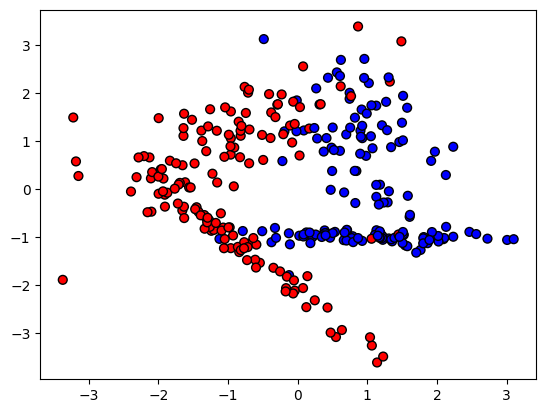

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_classification

cm_bright = ListedColormap(['#FF0000', '#0000FF'])
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, n_informative=2, random_state=10, n_clusters_per_class=2)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=cm_bright, edgecolors='k')
plt.show()

**Prepare Blobs dataset**

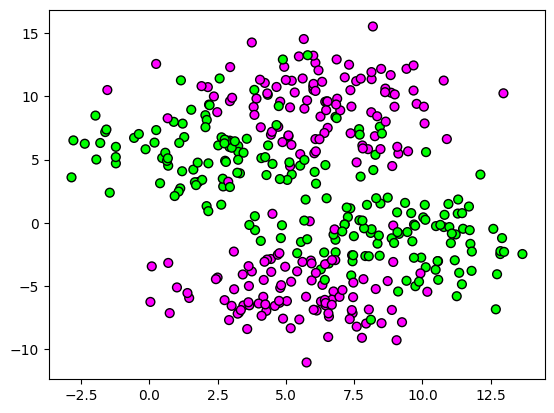

In [4]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=400, centers=4, cluster_std=2.5, random_state=13)
y[y==1]=0; y[y==2]=1; y[y==3]=1
y[y == 0] = -1

cm_bright = ListedColormap(['#FF00FF', '#00FF00'])
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=cm_bright, edgecolors='k')
plt.show()

We will implement the $\texttt{RandomForest}$ and $\texttt{AdaBoost}$ algorithms. In the case of $\texttt{RandomForest}$, **we will implement a simple version, not the complete version**. 

Additionally, we will analyze the characteristics of each algorithm using $\texttt{Precision}$, $\texttt{Recall}$, $\texttt{F1 score}$, and $\texttt{Precision-Recall curve}$.

These two algorithms differ in numerous aspects. Let's apply $\texttt{SimpleRandomForest}$ and $\texttt{AdaBoost}$ to the datasets and find how they are different.

---

### DecisionTreeClassifier ###

We will use ```sklearn.tree.DecisionTreeClassifier``` to easily implement $\texttt{SimpleRandomForest}$ and $\texttt{AdaBoost}$.
```python
from sklearn.tree import DecisionTreeClassifier
```

* **SimpleRandomForest**
    * Use ```DecisionTreeClassifier(max_depth=self.max_depth)``` as a decision tree.
    
      
* **AdaBoost**
    * Use ```DecisionTreeClassifier(max_depth=1)``` as a decision stump.
    
    
In this assignment, we will use $\texttt{DecisionTreeClassifier}$ to implement $\texttt{SimpleRandomForest}$ and $\texttt{AdaBoost}$.

> ```DecisionTreeClassifier.fit(X, y, sample_weight=None)```
> ```
>Description:
>    Build a decision tree classifier from the training set.
> Args:
>     X: (N, d) numpy array. Training samples.
>     y: (N,) numpy array. Ground truth classes.
>     sample_weight: [Option] (N,) numpy array. Weights for sampling with replacement.
> Returns:
> ```

> ```DecisionTreeClassifier.predict(X)```
>```
>Description:
>    Predict classes for X.
>Args:
>    X: (N, d) numpy array. Training/testing samples.            
>Returns:
>    pred: (N, ) numpy array. Prediction of classifier.
>```

**NOTE**: 
- In $\texttt{SimpleRandomForest}$ and $\texttt{AdaBoost}$ implementation, exploiting ```sklearn.tree``` and ```sklearn.ensemble``` (or equivalent) except ```sklearn.tree.DecisionTreeClassifier``` **will not be allowed**.
  
- When you use ```sklearn.tree.DecisionTreeClassifier```, just set the parameter mentioned above, and use the default setting for other parameters.

---

### P1. "Simple" RandomForest (*20 points*)

P1.1 Implement a simple random forest (```SimpleRandomForest``` class) for binary classification. Note that the RandomForest algorithm uses a **Bagging** (i.e. Bootstrap aggregation) and a randomization technique. (*10 points*)  

> **Bagging and randomization**: RandomForest begins by creating multiple bootstrap samples from the original dataset ${D_1, D_2, ..., D_t}$. Each sample is generated by randomly selecting data points with replacement. Furthermore, best split is chosen from a random sample of attributes instead of all attributes.
>> * For each decision tree in the **original** RandomForest, a random subset of dataset and a random subset of features are chosen at **each node** to determine the best split.  
>> * <U>However, we will use randomized features for ***each decision tree***, not for each node.<U>  
>> * That is, you can just train ```DecisionTreeClassifier()``` class (i.e. a decision tree) on **a single set of randomized features** of bootstrap samples.
>  
> **Quality metric**: Classification error computing the fraction of mistakes.  
> **Prediction**: $$\hat{\mathbf{y}}=\text{sign} \left( \sum_{t=1}^{T} f_t(\mathbf{x}(D_t[:, \text{indices_t}])) \right)$$(voting)  
> **Save weak classifier**: Use ```dictionary```, i.e., {```'feature_indices'```: $\text{indices_t}$, ```'classifier'```: $f_t(\mathbf{x})$}. Then append the dictionary to the attribute list (```self.classifiers```).  
    
*Refer the lecture note 12 p.11-16.   

P1.2 Run the codes provied to plot accuracies over the number of classifiers and max_depth. Analyze the results and how each component affects the performance. (*5 points*) 


P1.3 Implement the ```compute_each_accuracies``` function that inputs classifiers of bagging (i.e., a list of dictionary that contains 'feature_indices' and 'classifier' as keys), a training dataset, a test dataset, and outputs the prediction accuracies on training and test datasets. Plot the accuracies on training and testing samples of each classifier. Use the $\frac{\text{number of correct predictions}}{\text{total number of samples}}$ to compute the accuracy. (*5 points*)

### P2. AdaBoost (*20 points*)

P2.1 Implement an adaboost (```AdaBoost``` class) for binary classification. Note that the AdaBoost algorithm uses a **weighted sampling with replacement** to learn the weak classifier $f_{t}(\mathbf{x})$ with data weights $\alpha$. (*10 points*)  
> **Weighted sampling with data weight**: This samples data points from the original dataset with corresponding sampling probabilities (i.e., weights for individual training samples).
>> For example, let's suppose the following data points $\mathbf{x}$ and corresponding weights $\alpha$: $\mathbf{x}=[x_1, x_2, x_3]$ and $\alpha = [0.1, 0.6, 0.3]$. In the weighted sampling procedure, $x_1$, $x_2$, and $x_3$ are chosen with probabilities of $0.1$, $0.6$, and $0.3$, respectively. That is, the data point with a higher weight is more likely to be chosen.
>  
> **Quality metric**: Classification error computing the fraction of mistakes.  
> **Compute coefficient**: $\hat{w}_t = \frac{1}{2} \ln \left( \frac{1 - \epsilon_t}{\epsilon_t} \right)$  
> **Recompute weight**: $\alpha_{t+1}^{i} = \alpha_{t}^{i} e^{{-\hat{w}_{t} y_{i} f_{t}(\mathbf{x})}}$ , where $y_{i} = 1 \text{or} -1$.  
> **Normalize weight**: $\alpha_{t}^{i} = \frac{\alpha_{t}^{i}}{\sum_{i=1}^{N} \alpha_{t}^{i}}$  
> **Prediction**: $\hat{\mathbf{y}}=\text{sign} \left( \sum_{t=1}^{T} \hat{w_t} f_t(\mathbf{x}) \right)$  
> **Save weak classifier**: Use ```dictionary```, i.e., {```'coefficient'```: $\hat{w}_t$, ```'classifier'```: $f_t(\mathbf{x})$}. Then append the dictionary to the attribute list (```self.classifiers```).  

*Refer the lecture note 12 p.35-37.*

P2.2 Run the code provied to plot the weighted error and the coefficient of each classifier. Analyze the results and relationship between the weighted errors and the coefficients. (*5 points*)  

P2.3 Implement the ```compute_staged_accuracies``` function that inputs boosted classifiers (i.e., a list of dictionary that contains 'coefficient' and 'classifier' as keys), a training dataset, a test dataset, and outputs the prediction accuracies on training and test datasets. Plot the accuracies on training and testing samples, over the number of classiferes. Use the $\frac{\text{number of correct predictions}}{\text{total number of samples}}$ to compute the accuracy. (*5 points*)



### P3 Precision and Recall (*20 points*)

P3.1 Implement the ```get_precision```, ```get_recall```, ```get_f1_score``` function (*10 points*)

P3.2 Implement the ```get_precision_recall_curve``` funcrtion, using probabilities of positive class in y_proba as thresholds in ```get_precision_recall_curve```
(x-axis should be *recall* and y-axis should be *precision*) (*10 points*)

### P4. Analysis (*40 points*)

P4.1 Describe the differences between bagging and boosting with your observations from ```SimpleRandomForest``` and ```AdaBoost```. (*10 points*)

P4.2 Analyze and contrast the logistic regression, (simple) randomforest, and adaboost in terms of objective functions. (*5 points*)

P4.3    
(1) Analyze and contrast the logistic regression, (simple) random forest, and adaboost based on the *Precision*, *Recall* and *F1 score*. (*5 points*)\
(2) Analyze and contrast the logistic regression, (simple) random forest, and adaboost based on the *Precision-Recall* curve. (*5 points*)

P4.4  
(1) Run the codes provided to plot decision boundaries and prediction accuracies on test dataset. Analyze and contrast the decision boundaries of the classification methods (logistic regression, bagging decision tree, and boosted decision tree). (*10 points*)  
(2) Analyze and contrast the decision boundaries of the classification methods in the aspect of overfitting. Note that we are using more training samples, compared to the previous problem of P4.3(1).   (*5 points*)

---

## Results

In [5]:
from copy import deepcopy

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.datasets
from sklearn.model_selection import train_test_split

from project2 import *

### Prepare Dataset

In [6]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=2000, n_features=15, n_redundant=0, n_informative=12, random_state=1, n_clusters_per_class=2, weights=[0.5])
y[y == 0] = -1

n_split = 1500

X_train, X_test = X[:n_split], X[n_split:]
y_train, y_test = y[:n_split], y[n_split:]

print(X_train.shape)
print(X_test.shape)

(1500, 15)
(500, 15)


---

#### P1.1 Implement a simple random forest (```SimpleRandomForest``` class) for binary classification. Note that the RandomForest algorithm uses a **Bagging** (i.e. Bootstrap aggregation) and a randomization technique. (*10 points*)  

*Refer the lecture note 12 p.11-16.   

In [7]:
randomforest_classifier = SimpleRandomForest(50, max_depth=5)
randomforest_classifier.fit(X_train, y_train)

print(f"train: {np.average(randomforest_classifier.predict(X_train) == y_train)}, test: {np.average(randomforest_classifier.predict(X_test) == y_test)}")

train: 0.9306666666666666, test: 0.864


In [8]:
classifiers = randomforest_classifier.classifiers
print(len(classifiers))
print(classifiers[0].keys())
print(classifiers[0].values())

50
dict_keys(['classifier', 'feature_indices'])
dict_values([DecisionTreeClassifier(max_depth=5), array([12], dtype=int32)])


---

#### P1.2 Run the codes provied to plot accuracies over the number of classifiers and max_depth. Analyze the results and how each component affects the performance. (*5 points*) 

Answer here

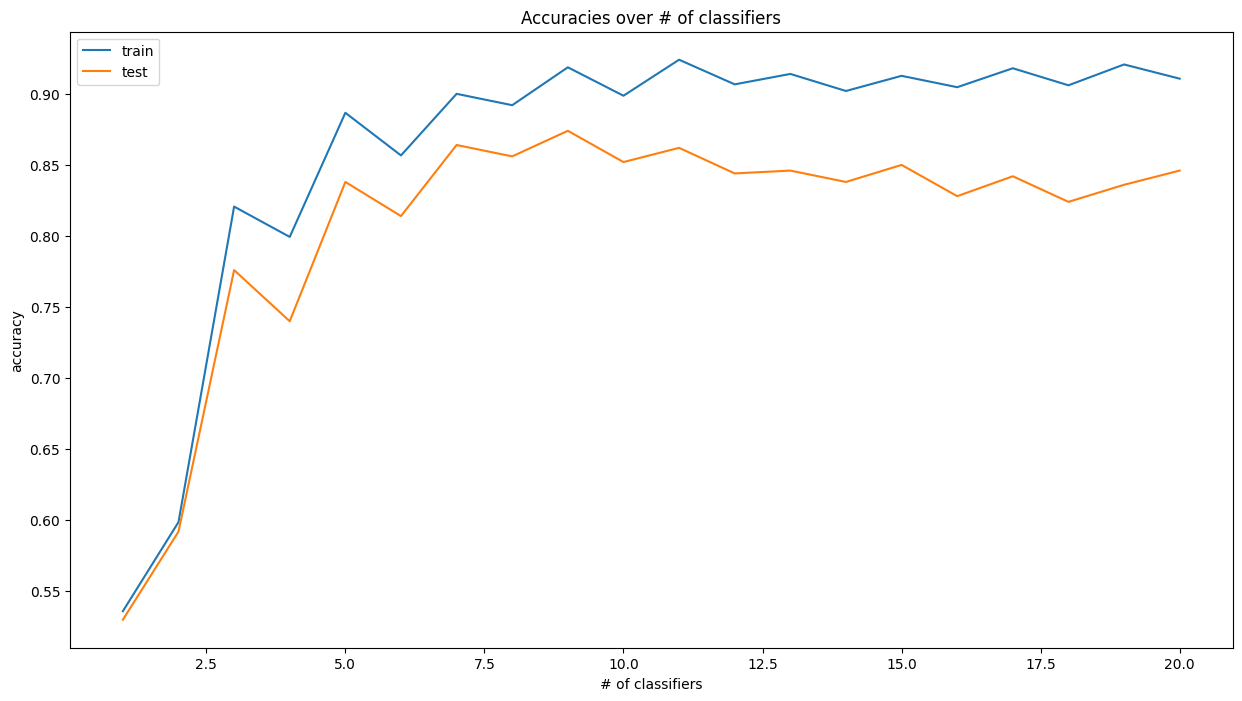

In [9]:
train_accuracy_estimators = []
test_accuracy_estimators = []
num_estimator_list = [i for i in range(1,21)]

for num_estimator in num_estimator_list:
    randomforest_classifier = SimpleRandomForest(num_estimator, max_depth=5)
    randomforest_classifier.fit(X_train, y_train)
    acc_train = np.average(randomforest_classifier.predict(X_train) == y_train)
    acc_test = np.average(randomforest_classifier.predict(X_test) == y_test)
    train_accuracy_estimators.append(acc_train)
    test_accuracy_estimators.append(acc_test)
    

plt.figure(figsize=[15, 8])

plt.plot(num_estimator_list, train_accuracy_estimators, label='train')
plt.plot(num_estimator_list, test_accuracy_estimators, label='test')
plt.title('Accuracies over # of classifiers')
plt.xlabel('# of classifiers')
plt.ylabel('accuracy')
plt.legend()
plt.show()

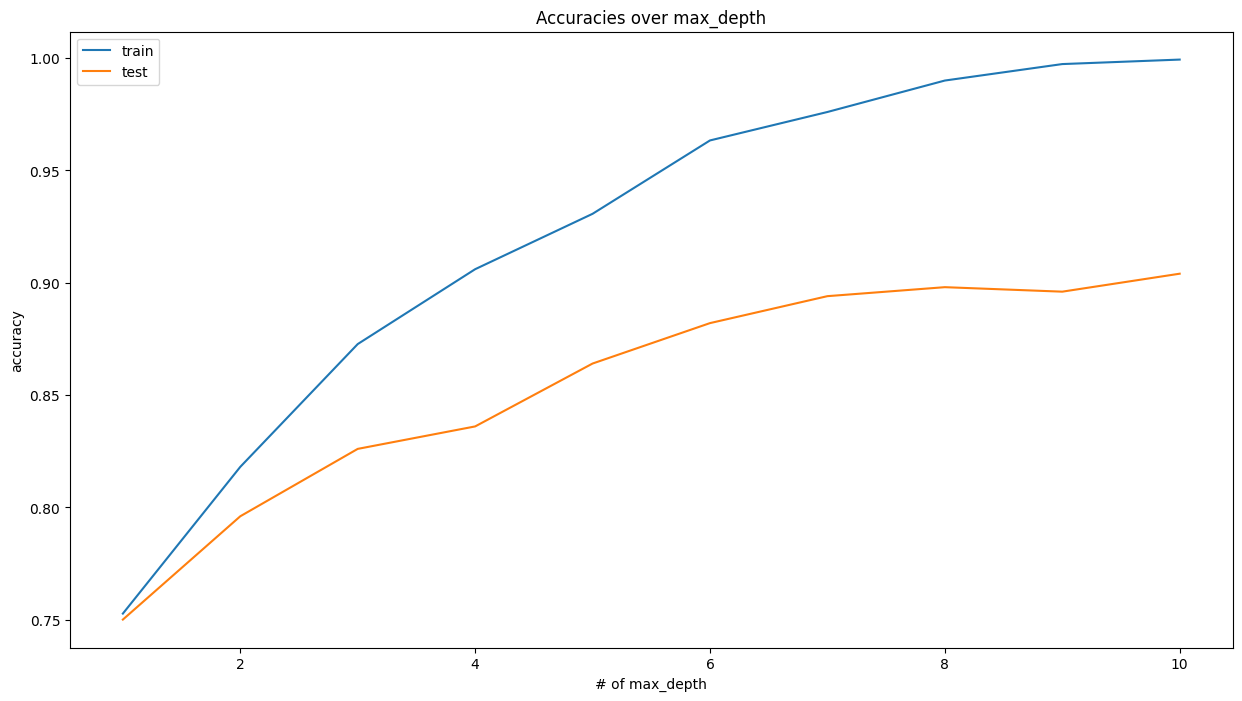

In [10]:
train_accuracy_depth = []
test_accuracy_depth = []
depth_list = [i for i in range(1,11)]

for depth in depth_list:
    randomforest_classifier = SimpleRandomForest(50, max_depth=depth)
    randomforest_classifier.fit(X_train, y_train)
    acc_train = np.average(randomforest_classifier.predict(X_train) == y_train)
    acc_test = np.average(randomforest_classifier.predict(X_test) == y_test)
    train_accuracy_depth.append(acc_train)
    test_accuracy_depth.append(acc_test)

plt.figure(figsize=[15, 8])

plt.plot(depth_list, train_accuracy_depth, label='train')
plt.plot(depth_list, test_accuracy_depth, label='test')
plt.title('Accuracies over max_depth')
plt.xlabel('# of max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

---

#### P1.3 Implement the ```compute_each_accuracies``` function that inputs classifiers of bagging (i.e., a list of dictionary that contains 'feature_indices' and 'classifier' as keys), a training dataset, a test dataset, and outputs the prediction accuracies on training and test datasets. Plot the accuracies on training and testing samples of each classifier. Use the $\frac{\text{number of correct predictions}}{\text{total number of samples}}$ to compute the accuracy. (*5 points*)

In [11]:
classifiers = randomforest_classifier.classifiers
acc_train, acc_test = compute_each_accuracies(classifiers, X_train, y_train, X_test, y_test)

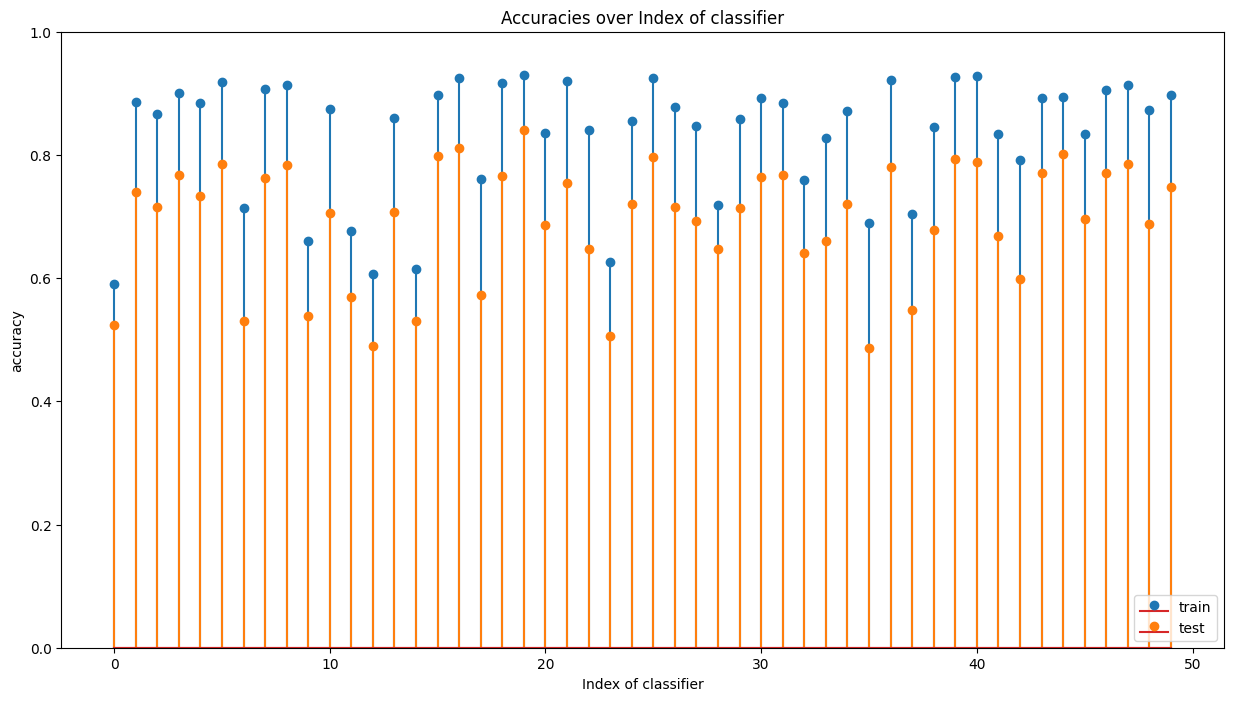

In [12]:
plt.figure(figsize=[15, 8])

plt.stem(acc_train, label='train')
plt.stem(acc_test, 'tab:orange', label='test')
plt.title('Accuracies over Index of classifier')
plt.xlabel('Index of classifier')
plt.ylabel('accuracy')
plt.ylim(0,1)

plt.legend(loc='lower right')
plt.show()

---

#### P2.1 Implement an adaboost (```AdaBoost``` class) for binary classification. Note that the AdaBoost algorithm uses a **weighted sampling with replacement** to learn the weak classifier $f_{t}(\mathbf{x})$ with data weights $\alpha$. (*10 points*)

In [13]:
adaboost_classifier = AdaBoost(50)
adaboost_classifier.fit(X_train, y_train)

print(f"train: {np.average(adaboost_classifier.predict(X_train) == y_train)}, test: {np.average(adaboost_classifier.predict(X_test) == y_test)}")

train: 0.8913333333333333, test: 0.866


In [14]:
classifiers = adaboost_classifier.classifiers
print(len(classifiers))
print(classifiers[0].keys())
print(classifiers[0].values())

50
dict_keys(['classifier', 'coefficient'])
dict_values([DecisionTreeClassifier(max_depth=1), np.float64(0.455814359384172)])


In [15]:
adaboost_classifier.error_history

[np.float64(0.2866666666666666),
 np.float64(0.28819821777874377),
 np.float64(0.3784386895098615),
 np.float64(0.32737494948418727),
 np.float64(0.3814429142636892),
 np.float64(0.36985691119958614),
 np.float64(0.3827019574286902),
 np.float64(0.45125758512566844),
 np.float64(0.41811169625984074),
 np.float64(0.39406657221154406),
 np.float64(0.3776809020987484),
 np.float64(0.3844961765984156),
 np.float64(0.4358242066459971),
 np.float64(0.44652562138995977),
 np.float64(0.4416589913902029),
 np.float64(0.4180660022547125),
 np.float64(0.4426059802594864),
 np.float64(0.4501205949487601),
 np.float64(0.46214335334418355),
 np.float64(0.4211307634983715),
 np.float64(0.4282541897512062),
 np.float64(0.43570224561862525),
 np.float64(0.4246394600797958),
 np.float64(0.44479686809757035),
 np.float64(0.443793842355922),
 np.float64(0.43562902272173565),
 np.float64(0.4198015957343638),
 np.float64(0.44568716887836013),
 np.float64(0.47137525201250274),
 np.float64(0.4369929637982869)

In [16]:
coefficients = [classifier['coefficient'] for classifier in adaboost_classifier.classifiers]
coefficients

[np.float64(0.455814359384172),
 np.float64(0.45207548866177216),
 np.float64(0.248090239174563),
 np.float64(0.3600409471949296),
 np.float64(0.24171414003525518),
 np.float64(0.26641535716195597),
 np.float64(0.23904772561899168),
 np.float64(0.09779541154640184),
 np.float64(0.16526494928951047),
 np.float64(0.21512513243568093),
 np.float64(0.2497016577809305),
 np.float64(0.23525365619953703),
 np.float64(0.1290634634994937),
 np.float64(0.10735933995034737),
 np.float64(0.11721591532180953),
 np.float64(0.16535885758691618),
 np.float64(0.11529622348005066),
 np.float64(0.10009172750237048),
 np.float64(0.07585846852501735),
 np.float64(0.1590666103919147),
 np.float64(0.1444887921766552),
 np.float64(0.12931147916635014),
 np.float64(0.1518781952906798),
 np.float64(0.11085817422364239),
 np.float64(0.11288943853554129),
 np.float64(0.12946039027956915),
 np.float64(0.16179395640441838),
 np.float64(0.10905595682477215),
 np.float64(0.05731216442466921),
 np.float64(0.1266875159

In [17]:
adaboost_classifier.data_weight

array([2.41422418e-04, 9.64946252e-04, 3.83158295e-04, ...,
       2.54793912e-04, 4.32594282e-04, 6.24363884e-05])

---

#### P2.2 Run the code provied to plot the weighted error and the coefficient of each classifier. Analyze the results and relationship between the weighted errors and the coefficients. (*5 points*)  

Answer here

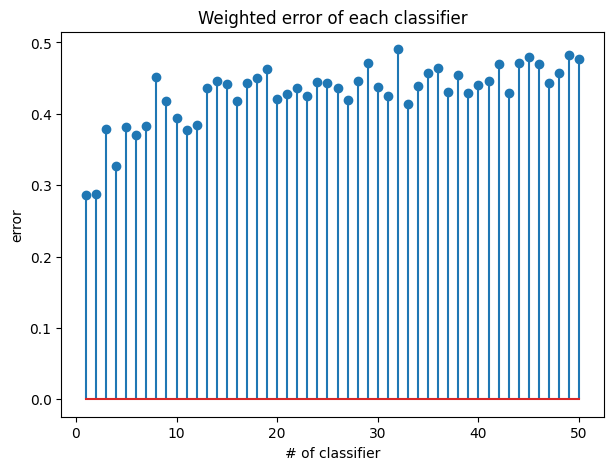

In [18]:
plt.figure(figsize=[7, 5])

plt.stem(range(1, len(adaboost_classifier.error_history)+1), adaboost_classifier.error_history)
plt.title('Weighted error of each classifier')
plt.xlabel('# of classifier')
plt.ylabel('error')
plt.show()

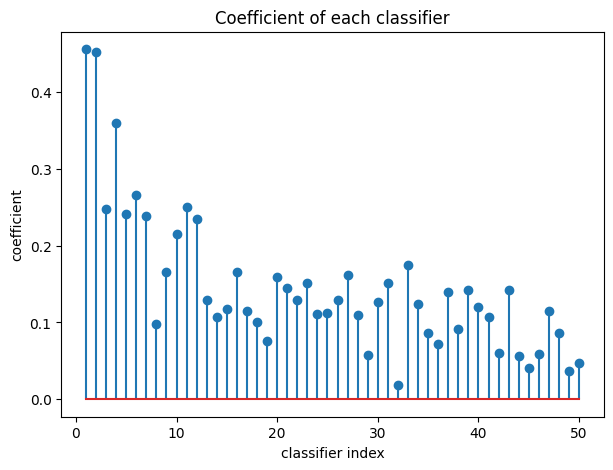

In [19]:
plt.figure(figsize=[7, 5])

plt.stem(range(1, len(coefficients)+1), coefficients)
plt.title('Coefficient of each classifier')
plt.xlabel('classifier index')
plt.ylabel('coefficient')
plt.show()

In [20]:
coeff = np.array(coefficients)

In [21]:
coeff_top5 = np.argsort(coeff)[::-1][:5]
coeff_bottom5 = np.argsort(coeff)[::-1][-5:]

In [22]:
coeff_bottom5

array([43, 49, 44, 48, 31])

---

#### P2.3 Implement the ```compute_staged_accuracies``` function that inputs boosted classifiers (i.e., a list of dictionary that contains 'coefficient' and 'classifier' as keys), a training dataset, a test dataset, and outputs the prediction accuracies on training and test datasets. Plot the accuracies on training and testing samples, over the number of classiferes. Use the $\frac{\text{number of correct predictions}}{\text{total number of samples}}$ to compute the accuracy. (*5 points*)

In [23]:
classifiers = adaboost_classifier.classifiers    

acc_train, acc_test = compute_staged_accuracies(classifiers, X_train, y_train, X_test, y_test)

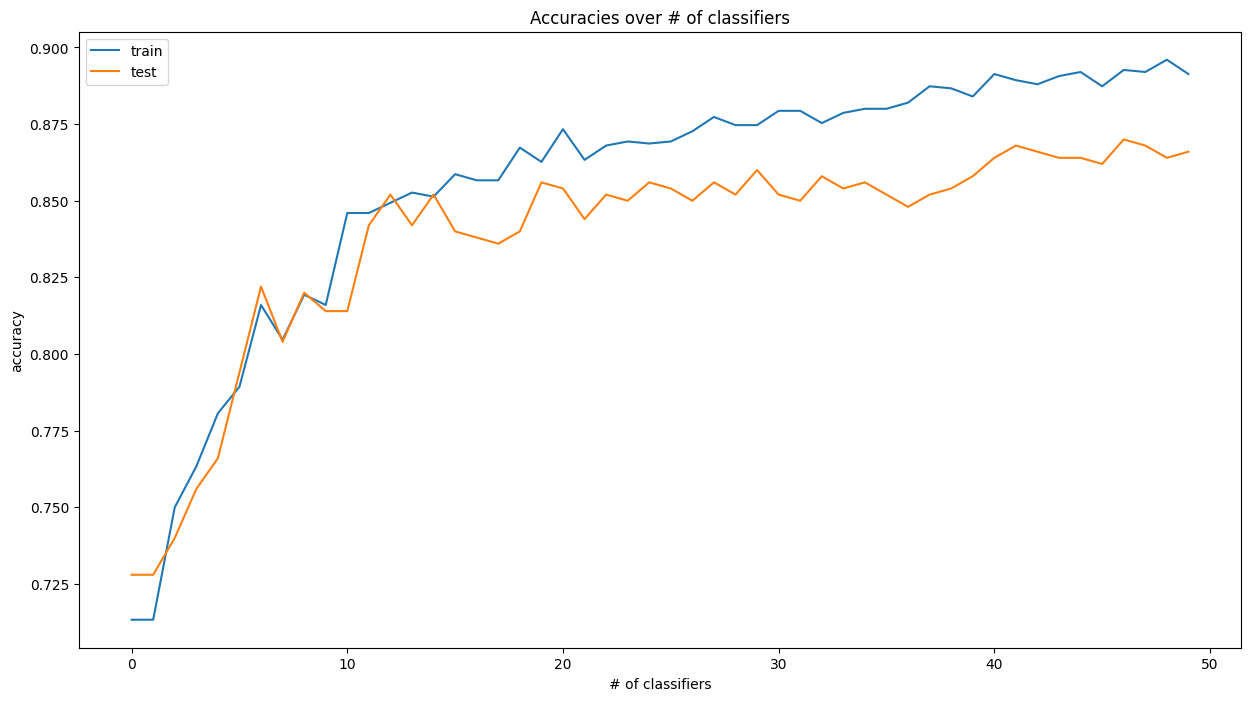

In [24]:
plt.figure(figsize=[15, 8])

plt.plot(acc_train, label='train')
plt.plot(acc_test, label='test')
plt.title('Accuracies over # of classifiers')
plt.xlabel('# of classifiers')
plt.ylabel('accuracy')
plt.legend()
plt.show()

---

#### P3.1 Implement the ```get_precision```, ```get_recall```, ```get_f1_score``` function (*10 points*)

In [25]:
y_pred = randomforest_classifier.predict(X_test)

precision = get_precision(y_pred, y_test)
recall = get_recall(y_pred, y_test)
f1_score = get_f1_score(y_pred, y_test)

print(f"precision: {precision}, recall: {recall}, f1_score: {f1_score}")

precision: 0.8909774436090225, recall: 0.92578125, f1_score: 0.9080459770114943


#### P3.2 Implement the ```get_precision_recall_curve``` funcrtion, using probabilities of positive class in y_proba as thresholds in ```get_precision_recall_curve```
(x-axis should be *recall* and y-axis should be *precision*) (*10 points*)

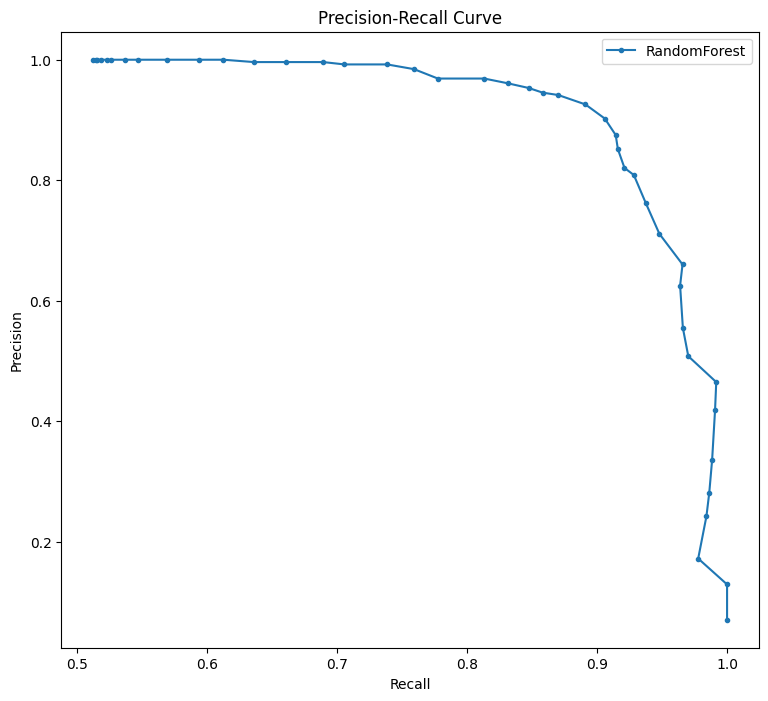

In [26]:
pre_ran, rec_ran = plot_precision_recall_curve(randomforest_classifier.predict_proba(X_test), y_test)

# Plot the precision-recall curve
plt.figure(figsize=[9, 8])
plt.plot(pre_ran, rec_ran, marker='.', label='RandomForest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

---

#### P4.1 Describe the differences between bagging and boosting with your observations from ```SimpleRandomForest``` and ```AdaBoost```. (*10 points*)

Answer here

---

#### P4.2 Analyze and contrast the logistic regression, (simple) randomforest, and adaboost in terms of objective functions. (*5 points*)

Answer here

**Logisitc Regression**

In [27]:
from sklearn.linear_model import LogisticRegression

regrssor = LogisticRegression()
regrssor.fit(X_train, y_train)
print(f"train: {np.average(regrssor.predict(X_train) == y_train)}, test: {np.average(regrssor.predict(X_test) == y_test)}")

train: 0.8873333333333333, test: 0.882


**Decision Stump**

In [28]:
stump = DecisionTreeClassifier(max_depth=1)
stump.fit(X_train, y_train)
print(f"train: {np.average(stump.predict(X_train) == y_train)}, test: {np.average(stump.predict(X_test) == y_test)}")

train: 0.7133333333333334, test: 0.728


**Decision Tree**

In [29]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print(f"train: {np.average(tree.predict(X_train) == y_train)}, test: {np.average(tree.predict(X_test) == y_test)}")

train: 1.0, test: 0.8


**SimpleRandomForest**

In [30]:
print(f"train: {np.average(randomforest_classifier.predict(X_train) == y_train)}, test: {np.average(randomforest_classifier.predict(X_test) == y_test)}")

train: 0.9993333333333333, test: 0.904


**Adaboost**

In [31]:
print(f"train: {np.average(adaboost_classifier.predict(X_train) == y_train)}, test: {np.average(adaboost_classifier.predict(X_test) == y_test)}")

train: 0.8913333333333333, test: 0.866


---

#### P4.3 (1) Analyze and contrast the logistic regression, (simple) random forest, and adaboost based on the *Precision*, *Recall*, and *F1 score* (*5 points*)

Answer here

In [32]:
precision_ran = get_precision(randomforest_classifier.predict(X_test), y_test)
recall_ran = get_recall(randomforest_classifier.predict(X_test), y_test)
f1_ran = get_f1_score(randomforest_classifier.predict(X_test), y_test)

precision_ada = get_precision(adaboost_classifier.predict(X_test), y_test)
recall_ada = get_recall(adaboost_classifier.predict(X_test), y_test)
f1_ada = get_f1_score(adaboost_classifier.predict(X_test), y_test)

precision_log = get_precision(regrssor.predict(X_test), y_test)
recall_log = get_recall(regrssor.predict(X_test), y_test)
f1_log = get_f1_score(regrssor.predict(X_test), y_test)

print(f"                    | Precision    | Recall       | F1 score")
print(f"LogisticRegression  | {precision_log:.10f} | {recall_log:.10f} | {f1_log:.10f}")
print(f"RandomForest        | {precision_ran:.10f} | {recall_ran:.10f} | {f1_ran:.10f}")
print(f"AdaBoost            | {precision_ada:.10f} | {recall_ada:.10f} | {f1_ada:.10f}")

                    | Precision    | Recall       | F1 score
LogisticRegression  | 0.8634686347 | 0.9140625000 | 0.8880455408
RandomForest        | 0.8909774436 | 0.9257812500 | 0.9080459770
AdaBoost            | 0.8566037736 | 0.8867187500 | 0.8714011516


---

#### P4.3 (2) Analyze and contrast the logistic regression, (simple) random forest, and adaboost based on the Precision-Recall curve (*5 points*)

Answer here

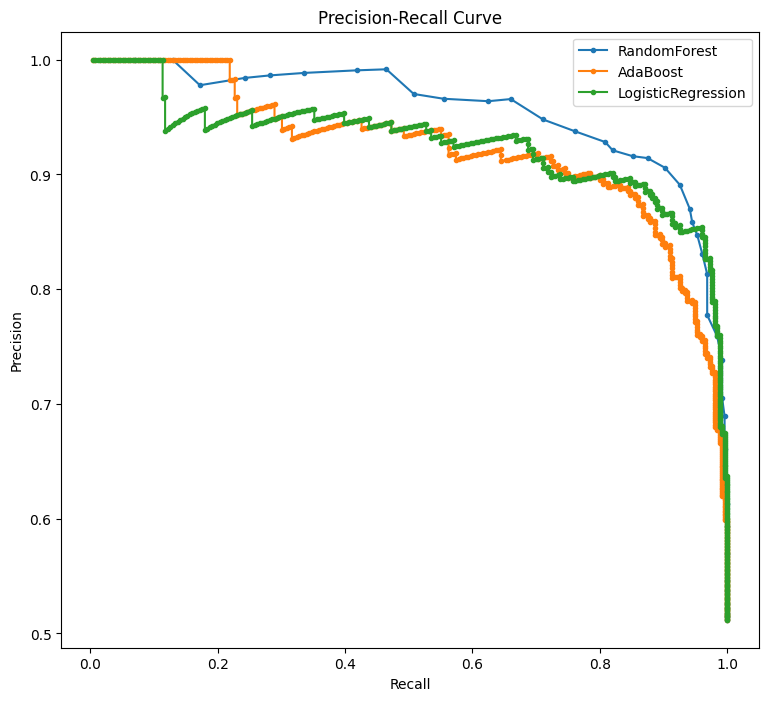

In [33]:
pre_ran, rec_ran = plot_precision_recall_curve(randomforest_classifier.predict_proba(X_test), y_test)
pre_ada, rec_ada = plot_precision_recall_curve(adaboost_classifier.predict_proba(X_test), y_test)
pre_log, rec_log = plot_precision_recall_curve(regrssor.predict_proba(X_test), y_test)

# Plot the precision-recall curve
plt.figure(figsize=[9, 8])
plt.plot(rec_ran, pre_ran, marker='.', label='RandomForest')
plt.plot(rec_ada, pre_ada, marker='.', label='AdaBoost')
plt.plot(rec_log, pre_log, marker='.', label='LogisticRegression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

---

#### P4.4 (1) Run the codes provided to plot decision boundaries and prediction accuracies on test dataset. Analyze and contrast the decision boundaries of the classification methods (logistic regression, bagging decision tree, and boosted decision tree). (*10 points*)  

**Do not use sklearn implementation of Randomforest or Adaboost.**

Answer here

In [34]:
# prepare dataset.
X,y= make_blobs(n_samples=200, centers=4, cluster_std=2.5, random_state=13)
y[y==1] = 0
y[y==2] = 1
y[y==3] = 1
y[y == 0] = -1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

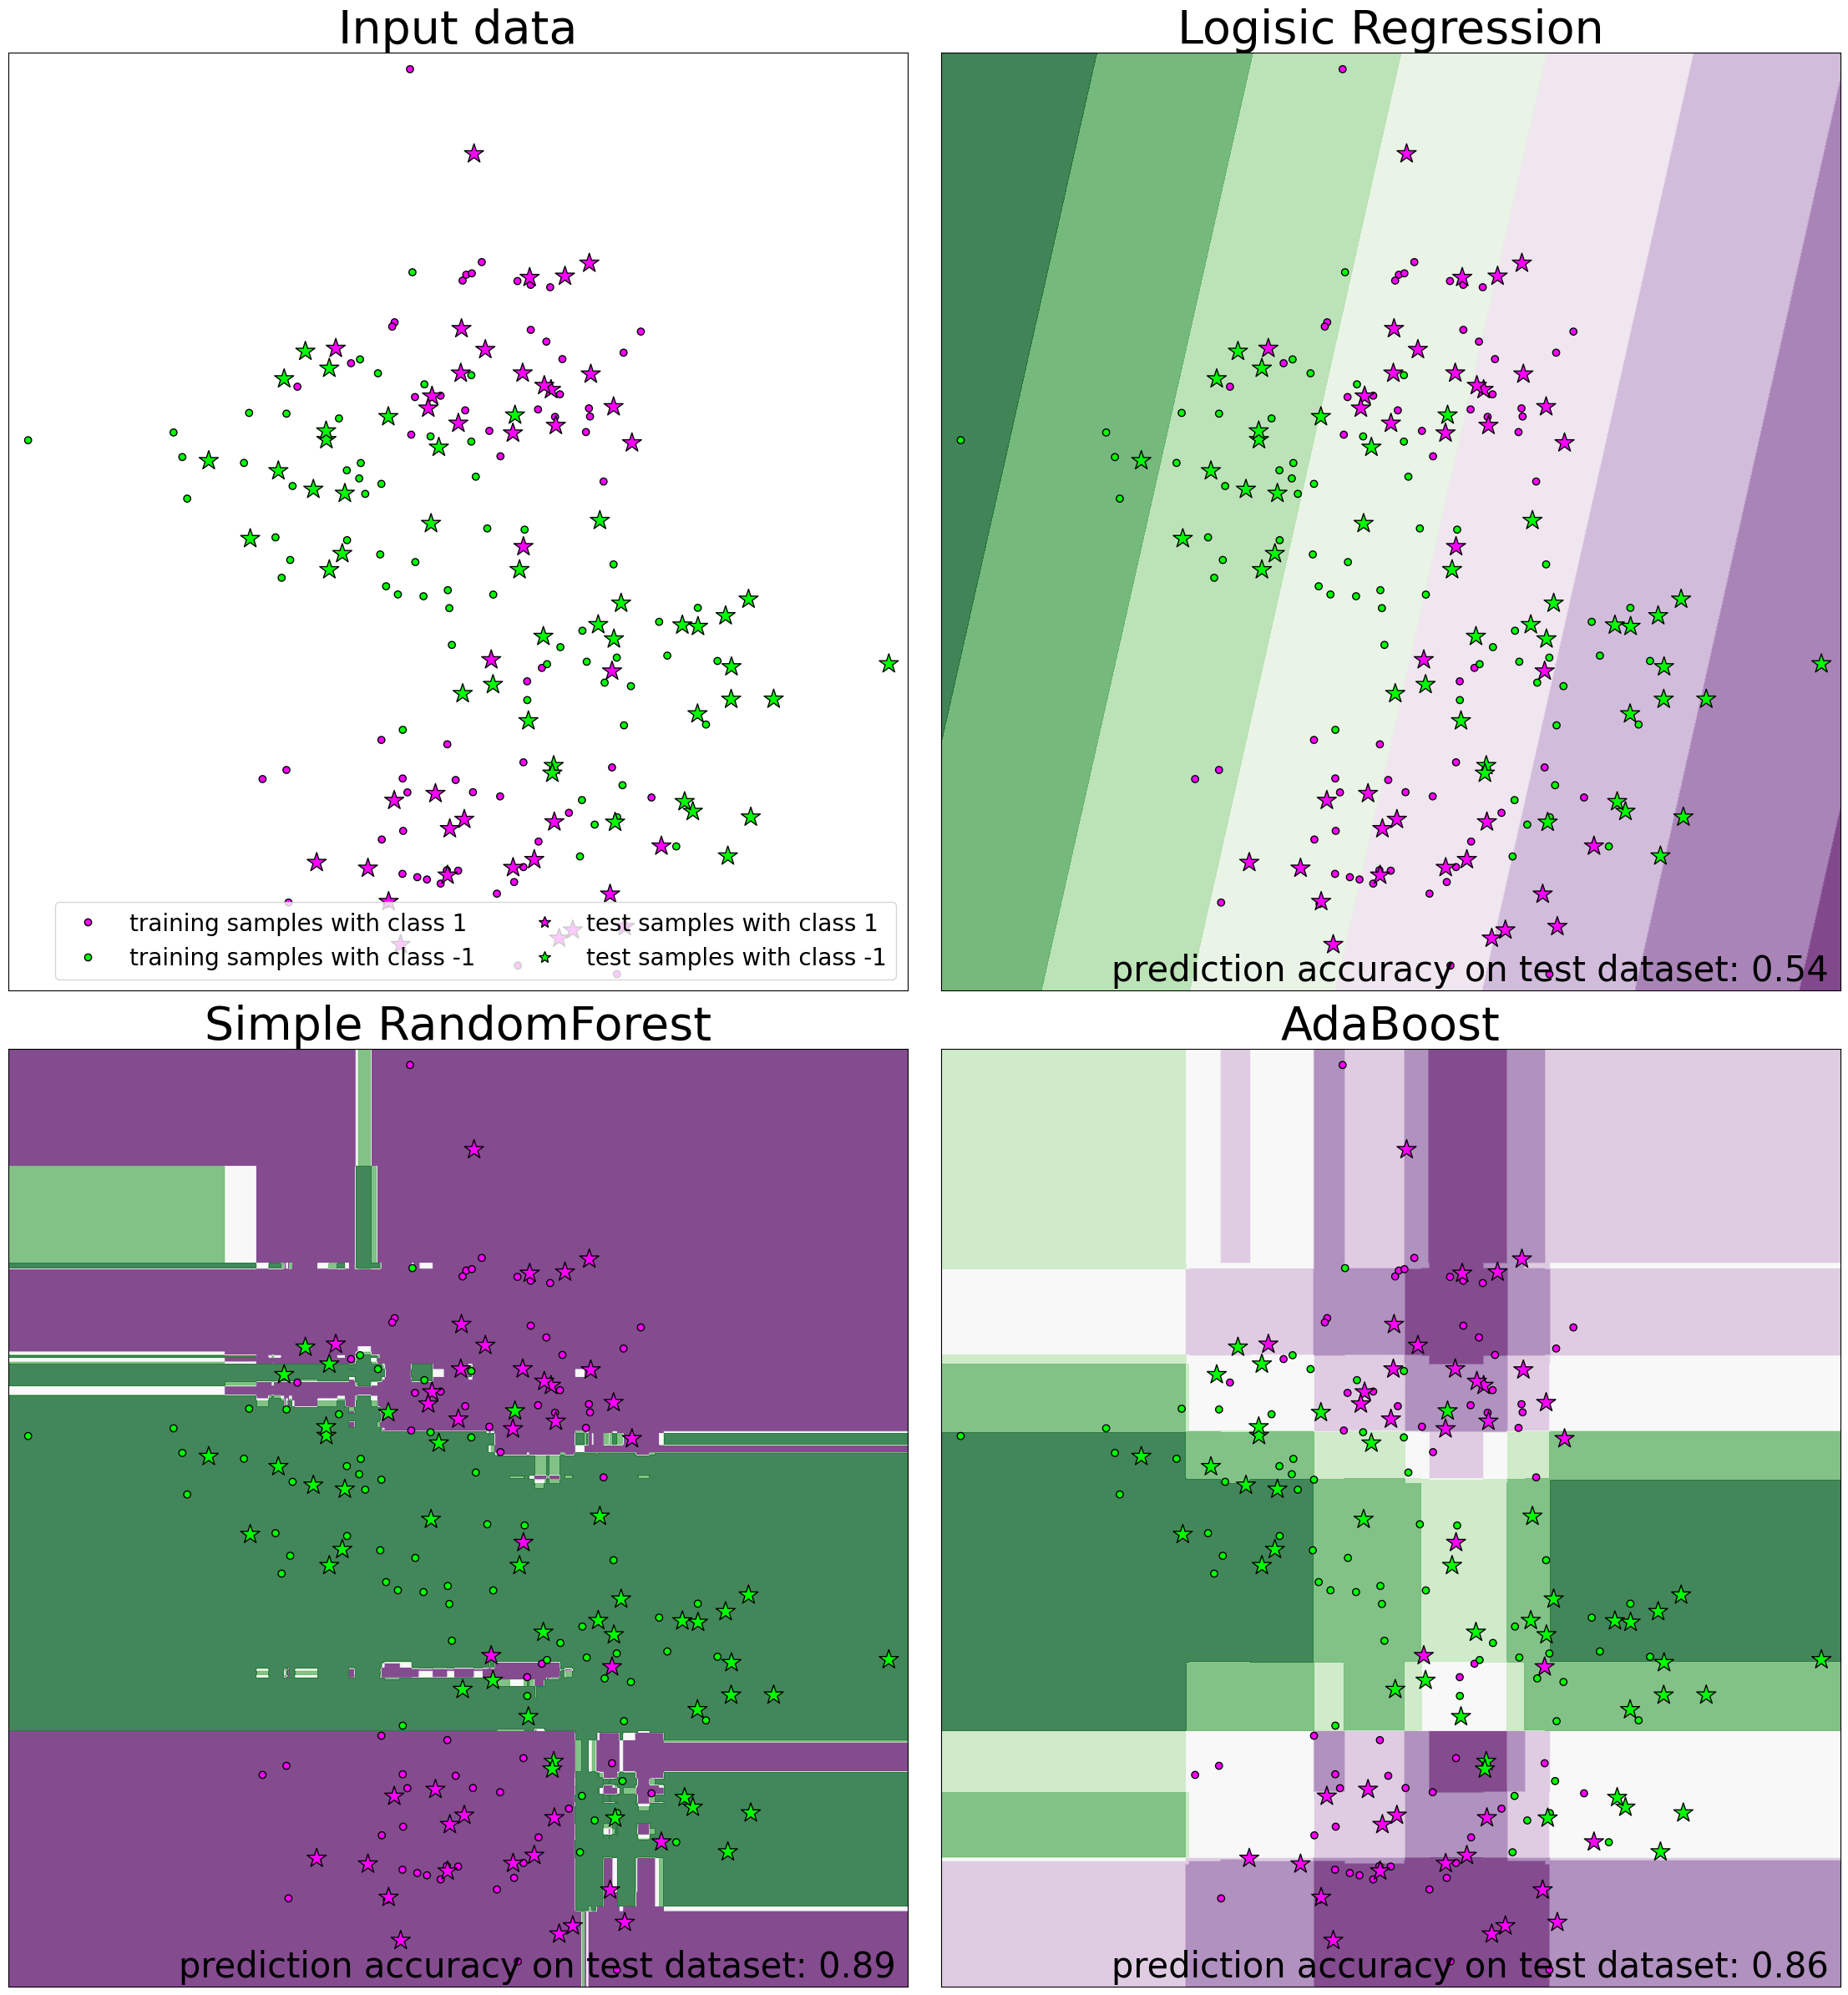

In [35]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

names = ["Logisic Regression", "Simple RandomForest", "AdaBoost"]

classifiers = [
    LogisticRegression(),
    SimpleRandomForest(50, max_depth=5),
    AdaBoost(50) # your implementation.
]

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='training samples with class 1', mfc='#FF00FF', mec='k'),
    Line2D([0], [0], marker='o', color='w', label='training samples with class -1', mfc='#00FF00', mec='k'),
    Line2D([0], [0], marker='*', color='w', label='test samples with class 1', mfc='#FF00FF', mec='k', ms=10),
    Line2D([0], [0], marker='*', color='w', label='test samples with class -1', mfc='#00FF00', mec='k', ms=10)
]

figure = plt.figure(figsize=(24, 24))
i = 1

# generate meshgrid for decision boundaries.
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# plot.
cm = plt.cm.PRGn
cm_bright = ListedColormap(['#FF00FF', '#00FF00'])

ax = plt.subplot(2, 2, 1)
ax.set_title("Input data", size=40)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k', label='train samples')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', s=300, marker='*', label='test samples')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.legend(handles=legend_elements, ncol=2, loc='lower right', fontsize=20)
ax.set_xticks(())
ax.set_yticks(())

# iterate over classifiers
i += 1
for name, clf in zip(names, classifiers):
    ax = plt.subplot(2, 2, i)
    clf.fit(X_train, y_train)
    score = np.average(clf.predict(X_test) == y_test)

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', s=300, marker='*')

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    ax.set_title(name, size=40)
    ax.text(xx.max() - .3, yy.min() + .3, ('prediction accuracy on test dataset: %.2f' % score).lstrip('0'), size=30, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()

---

#### P4.4 (2) Analyze and contrast the decision boundaries of the classification methods in the aspect of overfitting. Note that we are using more training samples, compared to the previous problem of P4.4(1).   (*5 points*)

Answer here

In [36]:
# Increase the number of training samples.
X,y= make_blobs(n_samples=400, centers=4, cluster_std=4, random_state=13)
y[y==1] = 0
y[y==2] = 1
y[y==3] = 1
y[y == 0] = -1

# Test samples are the same as previous ones.
X_train, _, y_train, _ = train_test_split(X, y, test_size=.4, random_state=42)

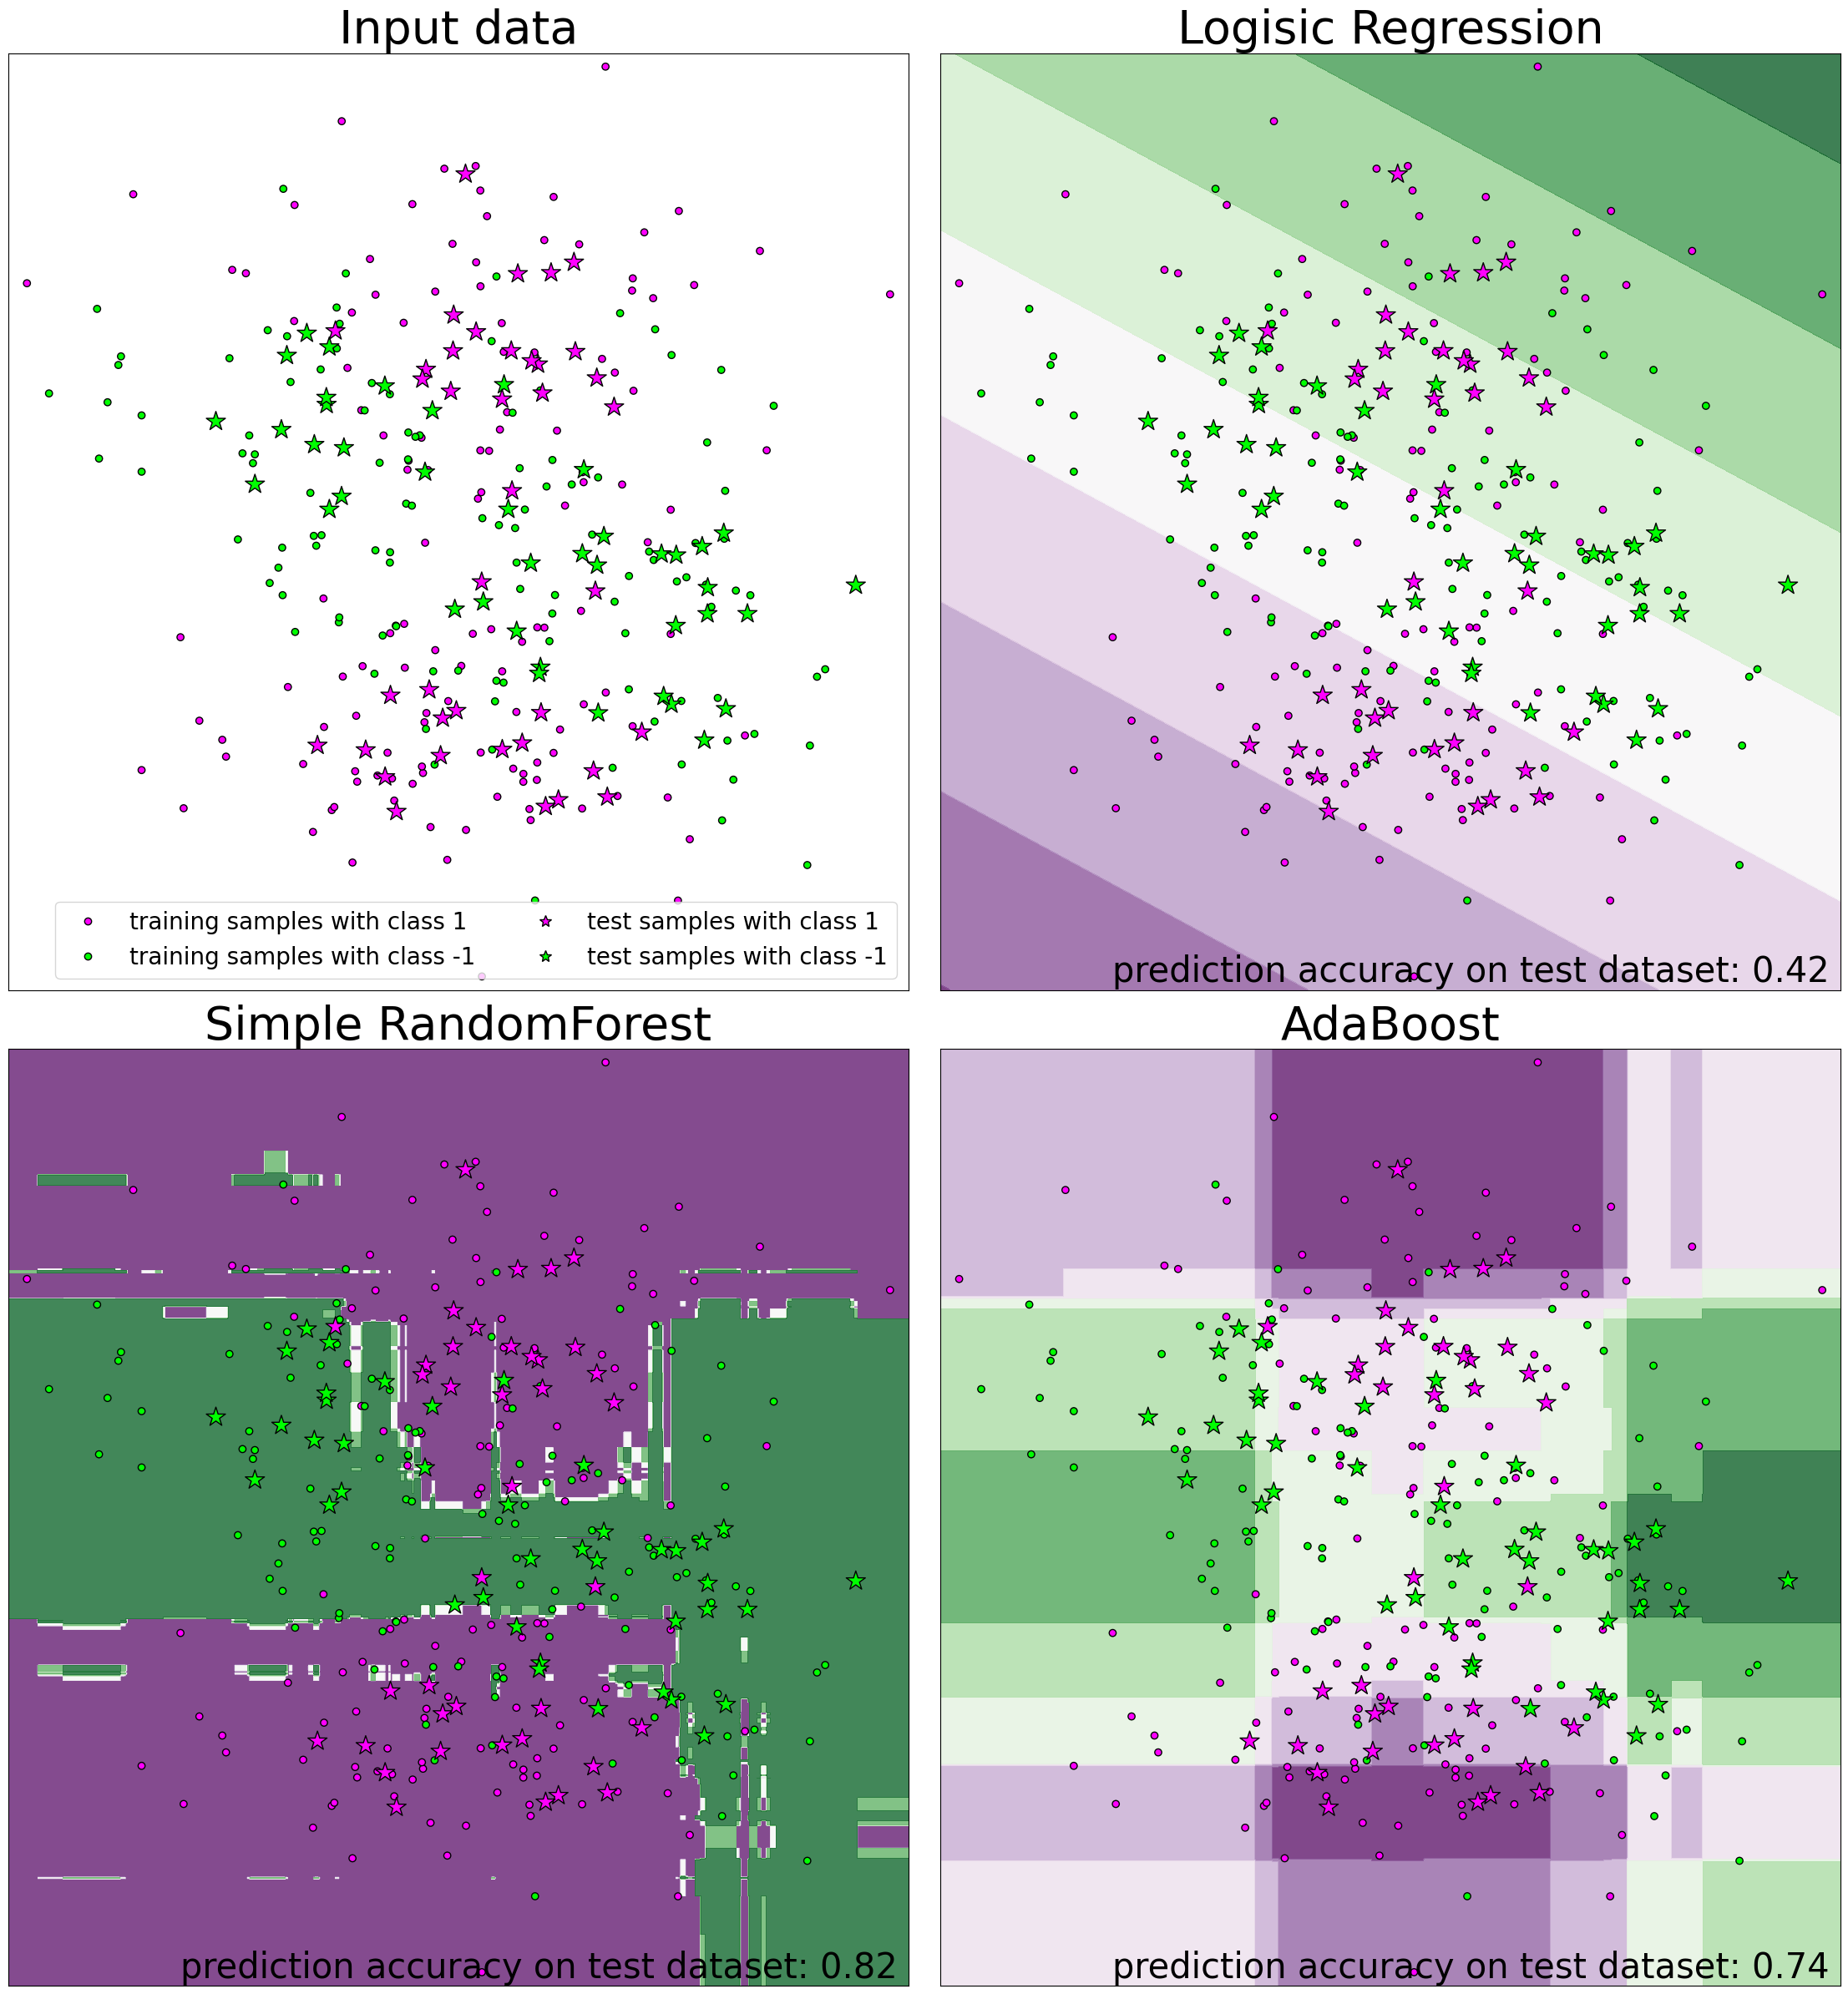

In [37]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

names = ["Logisic Regression", "Simple RandomForest", "AdaBoost"]

classifiers = [
    LogisticRegression(),
    SimpleRandomForest(50, max_depth=5),
    AdaBoost(50) # your implementation.
]

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='training samples with class 1', mfc='#FF00FF', mec='k'),
    Line2D([0], [0], marker='o', color='w', label='training samples with class -1', mfc='#00FF00', mec='k'),
    Line2D([0], [0], marker='*', color='w', label='test samples with class 1', mfc='#FF00FF', mec='k', ms=10),
    Line2D([0], [0], marker='*', color='w', label='test samples with class -1', mfc='#00FF00', mec='k', ms=10)
]

figure = plt.figure(figsize=(24, 24))
i = 1

# generate meshgrid for decision boundaries.
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# plot.
cm = plt.cm.PRGn
cm_bright = ListedColormap(['#FF00FF', '#00FF00'])

ax = plt.subplot(2, 2, 1)
ax.set_title("Input data", size=40)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k', label='train samples')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', s=300, marker='*', label='test samples')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.legend(handles=legend_elements, ncol=2, loc='lower right', fontsize=20)
ax.set_xticks(())
ax.set_yticks(())

# iterate over classifiers
i += 1
for name, clf in zip(names, classifiers):
    ax = plt.subplot(2, 2, i)
    clf.fit(X_train, y_train)
    score = np.average(clf.predict(X_test) == y_test)

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', s=300, marker='*')

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    ax.set_title(name, size=40)
    ax.text(xx.max() - .3, yy.min() + .3, ('prediction accuracy on test dataset: %.2f' % score).lstrip('0'), size=30, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()

---

In [38]:
pip install nbconvert[webpdf]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
!pip install -U playwright


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
!playwright install chromium